# Multi-Class Logistic Regression

Multiclass classification is the problem of classifying instances into one of three or more classes (classifying instances into one of two classes is called binary classification).

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Data

This dataset includes various measurements of three different penguin species, namely :

1. Adelie
2. Gentoo
3. Chinstrap. 

Same as Iris data which had measurements of the three different species.

**Goal : Build a logistic regression model to predict the species of the palmer penguin, using body part lengths and body mass data.**

The rigorous study was conducted in the islands of the Palmer Archipelago, Antarctica. These data were collected from 2007 to 2009 by Dr. Kristen Gorman with the Palmer Station Long Term Ecological Research Program, part of the US Long Term Ecological Research Network.

### Import Data

'penguins.csv'

In [2]:
df=pd.read_csv("penguins.csv")

In [27]:
df.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,species_num
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,0
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,0
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,0
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,0
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,0


In [3]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://editor.analyticsvidhya.com/uploads/42817culmen_depth.png")

### Exploratory Data Analysis and Visualization

**Explore if the dataset has any missing data points and create a statistical summary of the numerical features.**

**Show column count, row count and data types**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


**Statistical summary**

In [6]:
df.describe()

,rowid,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,172.500000,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,99.448479,5.459584,1.974793,14.061714,801.954536,0.818356
min,1.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,86.750000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,172.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,258.250000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,344.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


**Check all the Null Values**

In [7]:
df.isnull().sum()

rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

**Drop rows with nulls**

In [11]:
df.dropna(inplace=True)

**Create bar plot that shows the total counts per target label.**

<AxesSubplot:xlabel='species', ylabel='count'>

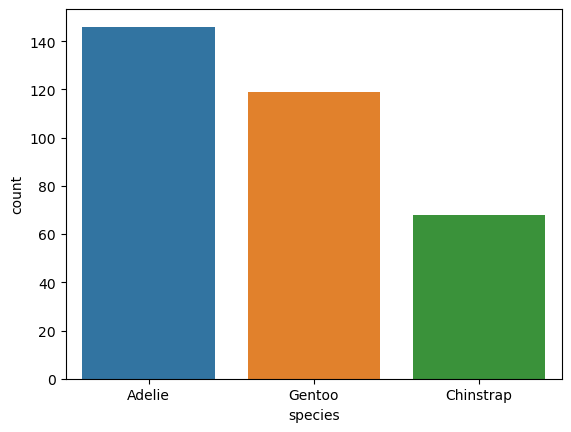

In [12]:
sns.countplot(x='species',data=df)

**Plot the data by flipper length and body mass of the penguins**

Tip: use Hue=target variable in this case "species"

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

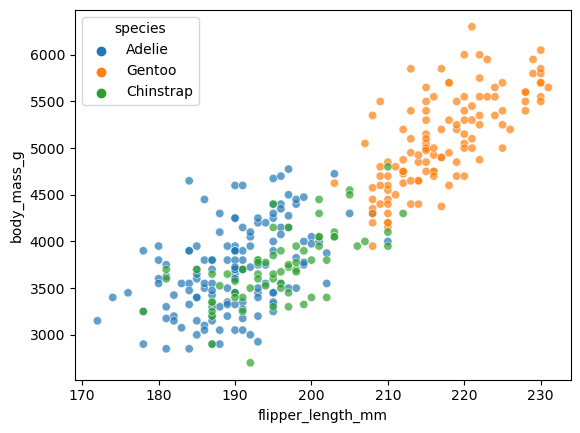

In [13]:
sns.scatterplot(x='flipper_length_mm',y='body_mass_g',hue='species',data=df,alpha=0.7)

**Plot the data by bill_depth_mm and bill length of the penguins**
Tip: use Hue=target variable in this case "species"

<AxesSubplot:xlabel='bill_depth_mm', ylabel='bill_length_mm'>

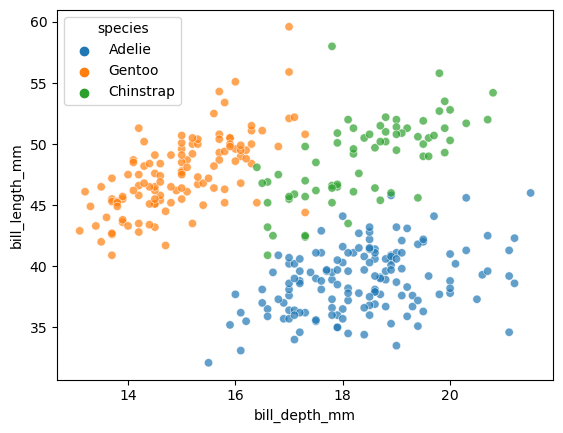

In [14]:
sns.scatterplot(x='bill_depth_mm',y='bill_length_mm',hue='species',data=df,alpha=0.7)

**Create a pairplot that displays the relationships between the following columns:**

    ['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
   
*Note: Running a pairplot on everything can take a very long time due to the number of features*

Tip: use Hue=target variable in this case "species"

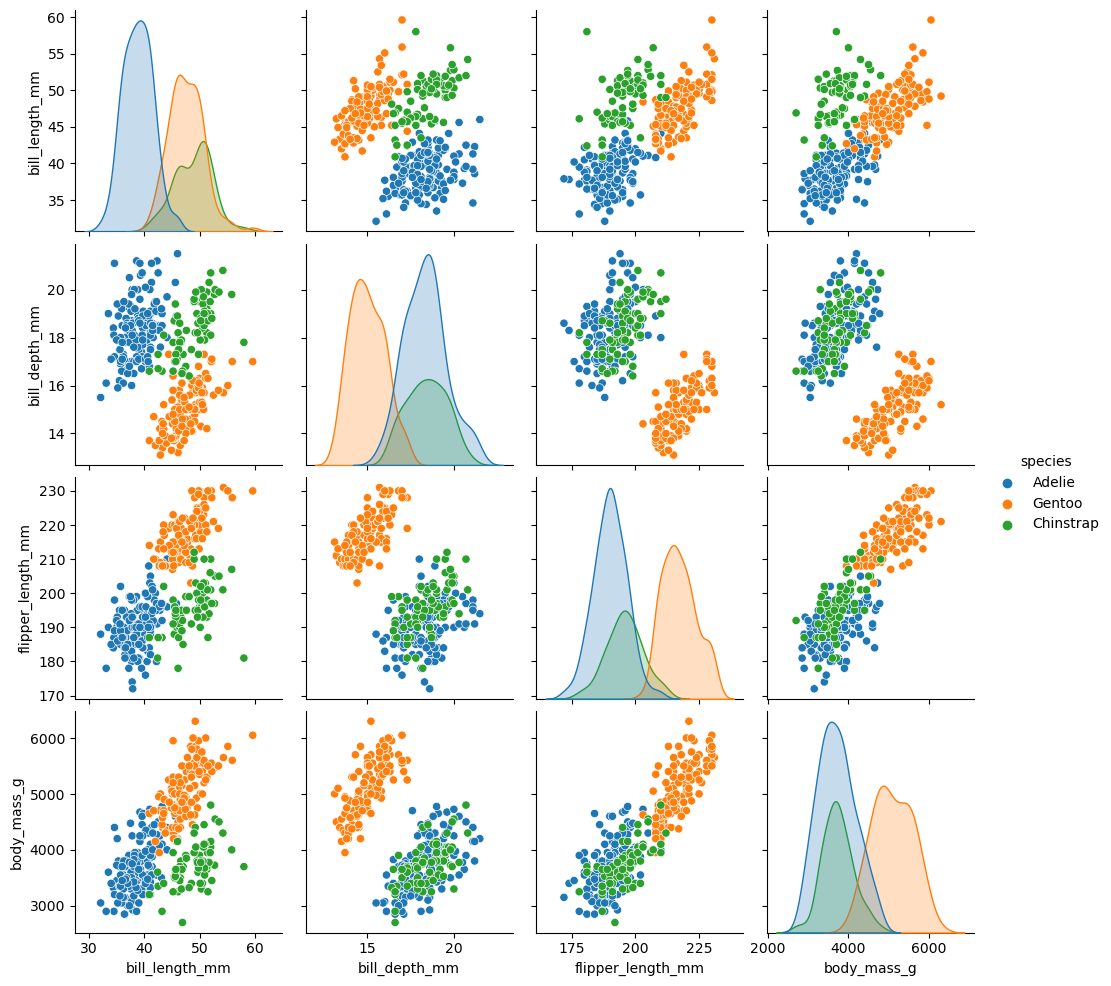

In [15]:
sns.pairplot(df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g' , 'species']], hue='species')

**Create a heatmap that displays the correlation between all the columns.**

In [16]:
df['species_num'] = df['species'].map({'Adelie':0,'Chinstrap':1,'Gentoo':2})

<AxesSubplot:>

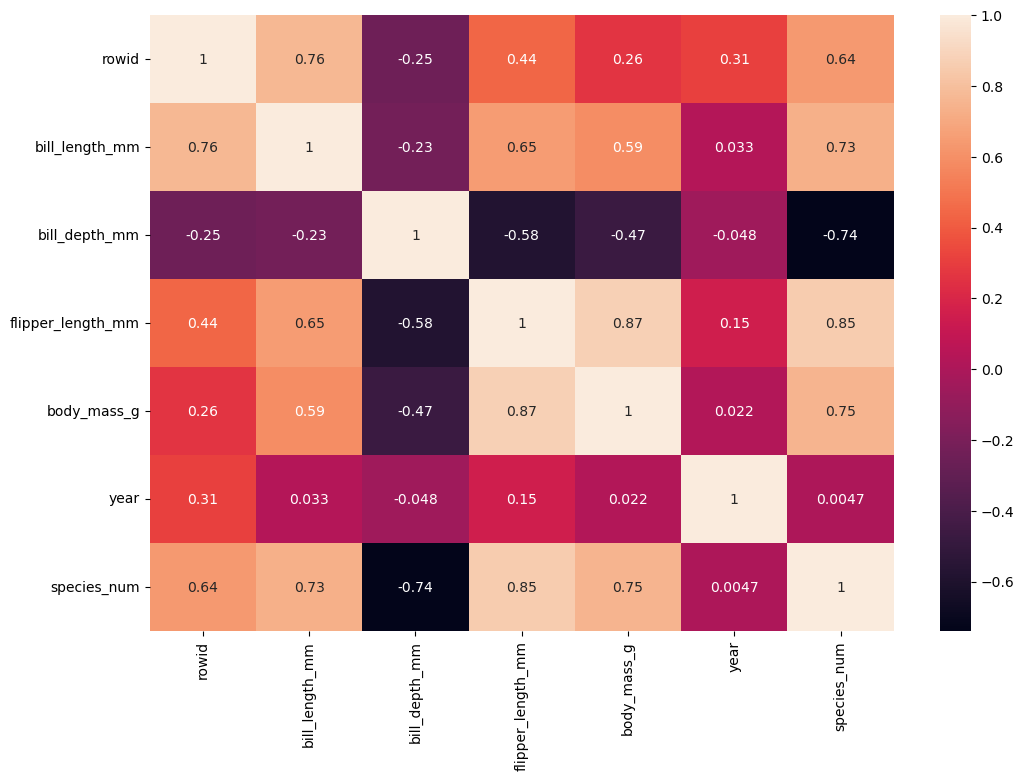

In [17]:
# check the correlation of the features.
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

----

# Machine Learning

## Train | Test Split and Scaling

**Separate the features from the labels into 2 objects, X and y.**

In [28]:
# Split data into X and y.
X = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g' ]]
y = df['species']

Scikit learn will process class labels if they were strings. So we can skip doing further processing like one hot encode. 

**Perform a train test split on the data, with the test size of 10% and a random_state of 101.**

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

**Create a StandardScaler object and normalize the X train and test set feature data.**

**Make sure you only fit to the training data to avoid data leakage (data knowledge leaking from the test set).**

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Multi-Class Logistic Regression Model

In [25]:
from sklearn.linear_model import LogisticRegression

In [33]:
logmodel = LogisticRegression()

In [34]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [35]:
predictions = logmodel.predict(X_test)

---------

## Model Performance Evaluation

**Let's now evaluate your model on the remaining 10% of the data, the test set.**

**Create the following evaluations:**

* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [55]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [76]:
# use this instead.
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.researchgate.net/publication/314116591/figure/fig7/AS:614085901185031@1523420896093/Confusion-matrix-for-multi-class-classification-The-confusion-matrix-of-a.png")

**Print confusion matrix**

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [38]:
confusion_matrix(y_test,predictions)

array([[15,  0,  0],
       [ 0, 10,  0],
       [ 0,  0,  9]], dtype=int64)

**Plot confusion matrix**

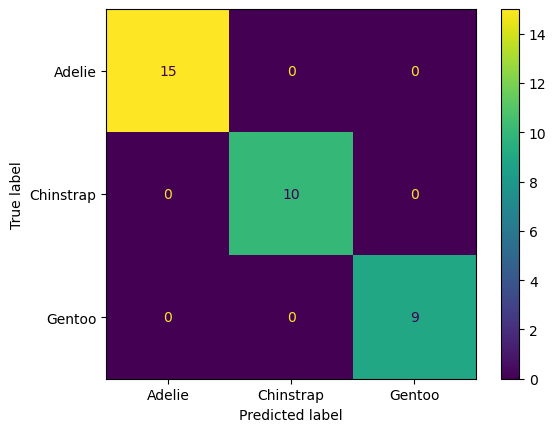

In [39]:
# Helps us plot the confusion matrix of a specific model. 
plot_confusion_matrix(logmodel,X_test,y_test)

**Print the classification report**

In [40]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        15
   Chinstrap       1.00      1.00      1.00        10
      Gentoo       1.00      1.00      1.00         9

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



**The above matrix calculates scores per class and gives an average of differences. If we want precision or recall scores using the formulas we seen in theory :**

In [53]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_score, recall_score

**Calculate precision**

In [58]:
precision_score(y_test, predictions,average='macro')

1.0

**Calculate Recall**

In [55]:
recall_score(y_test, predictions, average='macro')

1.0

**Final Task: A penguin with the following features has come into our hands:**
    
    bill_length_mm          38.7
    bill_depth_mm           19.2
    flipper_length_mm       240
    body_mass_g             5600

**What does your model predict for this penguin?**

*For convience, we created an array of the features for the penguin above*

In [44]:
penguin = [[38.7, 19.2, 240, 5600]]

**Predict Label**

In [46]:
logmodel.predict(penguin)

array(['Gentoo'], dtype=object)

**Predict Probability**

In [47]:
logmodel.predict_proba(penguin)

array([[0., 0., 1.]])

------

# Well Done !